# Ensemble Learning

- ML technique that combines the efforts of multiple ML models to create a more powerful model  
- strenghts o multiple models 
multiple types: 
- Bagging
- Boosting
- Stacking

# Bagging 
- technique of ensemble learning that combines multiple ML algos in parallel to create more powerful outcomes 
- concept uses bootstrapping of the trained data and aggregating the final outcome i.e. B-Agging  
- final prediction by averaging the estimators of the different models  

In [9]:
import ssl 
ssl._create_default_https_context = ssl._create_default_https_context #deactivate SSL cert error

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier #a bagging ensemble model 
from sklearn.metrics import classification_report, accuracy_score

In [12]:
url = "http://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
col_names = ['preg','plas','pres','skin','test','mass','pedi','age','class']
df = pd.read_csv(url,names=col_names )
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
x = df.values[:,0:8]
y = df["class"]

In [17]:
x.shape

(768, 8)

In [21]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64

In [13]:
#species 
kfolds = KFold(n_splits=10) #10 fold CV 
DTC=DecisionTreeClassifier()

In [22]:
#place all the trees in one bagging classifier 
baggc = BaggingClassifier(estimator=DTC, #name of the ML algo 
                          n_estimators=100, #num of ML algos - here we are using 100 decision tree classifiers (bagging formation)
                          random_state=12
)

In [24]:
results = cross_val_score(baggc,x,y,cv=kfolds)
results.mean() #this is the average score of the model performance  


0.7668831168831168

# ROC/AUC model evaluation 
- find the model with the largest area under the curve (AUC)
    - x axis: false positive rate 
    - y axis: true positive rate 
- ROC = receiver operating characteristic 
    - compare and evaluate different models 
    - set the best cutoff/threshold point 


In [25]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer

In [34]:
data_bc = load_breast_cancer()
x = data_bc.data
y = data_bc.target

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)

lr = LogisticRegression()
lr.fit(x_train,y_train)

c:\Users\chand\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
y_pred = lr.predict(x_test)
y_pred[:10]

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

#every prediction has a probability score. higher than 50% = category 1. lower than 50% = category 0. 

In [38]:
y_predproba = lr.predict_proba(x_test)
y_predproba[:10] #gives the prob of 0 class prediction 

array([[7.44235685e-02, 9.25576431e-01],
       [8.57979102e-03, 9.91420209e-01],
       [9.94816457e-01, 5.18354279e-03],
       [1.12473399e-03, 9.98875266e-01],
       [2.15294735e-03, 9.97847053e-01],
       [2.49545128e-02, 9.75045487e-01],
       [3.60756725e-04, 9.99639243e-01],
       [5.29740721e-02, 9.47025928e-01],
       [4.70102871e-03, 9.95298971e-01],
       [7.01248999e-04, 9.99298751e-01]])

In [42]:
y_predproba_positive = y_predproba[:,1]
y_predproba_positive

array([9.25576431e-01, 9.91420209e-01, 5.18354279e-03, 9.98875266e-01,
       9.97847053e-01, 9.75045487e-01, 9.99639243e-01, 9.47025928e-01,
       9.95298971e-01, 9.99298751e-01, 9.96044466e-01, 8.53133951e-20,
       2.89623454e-03, 8.74347882e-01, 6.16842279e-01, 3.11784761e-03,
       9.99446901e-01, 8.96962721e-04, 9.92593607e-01, 9.95827539e-01,
       9.99161922e-01, 8.14187634e-01, 1.08329009e-07, 9.96895768e-01,
       4.16419723e-01, 9.58296898e-01, 9.97788043e-01, 9.97899950e-01,
       7.60946087e-18, 9.70310470e-01, 9.61291689e-01, 4.72646823e-12,
       9.96502655e-01, 9.93737812e-01, 9.67657964e-04, 1.72405074e-02,
       9.67518588e-01, 9.95580835e-01, 9.99836005e-01, 9.98995151e-01,
       9.63950092e-01, 9.91567849e-01, 4.81464106e-16, 9.99001798e-01,
       8.06000024e-01, 9.98263212e-01, 9.97413615e-01, 9.78670734e-01,
       1.81228540e-01, 3.93330289e-04, 4.33386058e-01, 9.95424111e-01,
       2.15100953e-02, 9.72869411e-01, 9.95272892e-01, 9.31258485e-01,
      

In [43]:
#calculate false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, thresholds = roc_curve(y_test,y_predproba_positive)
roc_auc = auc(fpr,tpr)



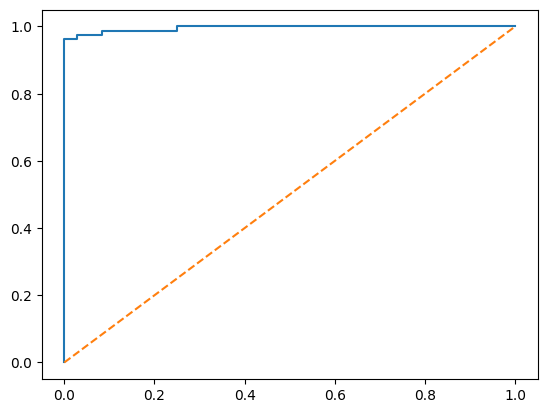

In [46]:
import matplotlib.pyplot as plt 
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='--') #read as (0,0) and (1,1) 

Since model is above orange line, model is performing well!
The goal is to find the model or algo that produces that highest curve that is closest to the top left corner 